<a href="https://colab.research.google.com/github/jabir-al-nahian/emotion-recognition/blob/main/Face_Emotion_FER_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip /content/drive/MyDrive/OG/FER.zip -d "/content/FER/"

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf

In [ ]:

IMAGE_SIZE = 48
train_images=[]
Y = []
with os.scandir("/content/FER/train") as it:
    for i in it:
        with os.scandir(i.path) as frac:
            for index, j in enumerate(frac):
                Y.append(i.name)
                image=cv2.imread(j.path)

                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                img = cv2.resize(gray, (IMAGE_SIZE,IMAGE_SIZE))
                train_images.append(img)


Y = np.asarray(Y)
train_images=np.array(train_images)
X=train_images
X = np.array(X).reshape(-1, 48, 48, 1) # converting it to 4 dimention
print(X.shape)
print(Y.shape)

(28709, 48, 48, 1)
(28709,)


In [ ]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (19235, 48, 48, 1)
y_train shape :  (19235,)
X_test shape :  (9474, 48, 48, 1)
y_test shape :  (9474,)


In [ ]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
y_train_new = [class_names.index(i) for i in y_train]
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = [class_names.index(i) for i in y_test]
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam

def create_model(input_shape=(48,48,1)):
    visible = Input(shape=input_shape, name='input')
    num_classes = 7

    x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(visible)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x)


    x = Conv2D(512, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x)
    flatten = Flatten()(x)
    ouput = Dense(num_classes, activation='softmax')(flatten)
    model = Model(inputs =visible, outputs = ouput)

    return model

In [ ]:
model = create_model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 11,
                               verbose = 1,
                               restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

In [ ]:
history=model.fit(X_train,y_train, epochs=100, batch_size=32, shuffle=True,validation_data=(X_test, y_test), callbacks = callbacks,
                                       use_multiprocessing = True)

Epoch 1/100
602/602 [==============================] - 46s 59ms/step - loss: 2.3621 - accuracy: 0.2164 - val_loss: 1.8294 - val_accuracy: 0.2542 - lr: 1.0000e-04
Epoch 2/100
602/602 [==============================] - 36s 60ms/step - loss: 1.9355 - accuracy: 0.2572 - val_loss: 1.8465 - val_accuracy: 0.2873 - lr: 1.0000e-04
Epoch 3/100
602/602 [==============================] - 37s 61ms/step - loss: 1.7632 - accuracy: 0.3115 - val_loss: 1.6480 - val_accuracy: 0.3606 - lr: 1.0000e-04
Epoch 4/100
602/602 [==============================] - 35s 58ms/step - loss: 1.6338 - accuracy: 0.3555 - val_loss: 1.5667 - val_accuracy: 0.3934 - lr: 1.0000e-04
Epoch 5/100
602/602 [==============================] - 36s 61ms/step - loss: 1.5294 - accuracy: 0.4051 - val_loss: 1.4612 - val_accuracy: 0.4368 - lr: 1.0000e-04
Epoch 6/100
602/602 [==============================] - 35s 58ms/step - loss: 1.4556 - accuracy: 0.4342 - val_loss: 1.4024 - val_accuracy: 0.4559 - lr: 1.0000e-04
Epoch 7/100
602/602 [=======

In [ ]:
from sklearn import metrics
label_pred = model.predict(X_test)

pred = []
for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

Y_test = np.argmax(y_test, axis=1)

print(metrics.classification_report(Y_test, pred))

297/297 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1354
           1       0.66      0.51      0.58       159
           2       0.50      0.43      0.46      1360
           3       0.80      0.84      0.82      2362
           4       0.55      0.61      0.58      1604
           5       0.48      0.52      0.50      1585
           6       0.74      0.70      0.72      1050

    accuracy                           0.62      9474
   macro avg       0.61      0.59      0.60      9474
weighted avg       0.62      0.62      0.62      9474



In [ ]:
from sklearn import metrics
test_accuracy = metrics.accuracy_score(Y_test, pred)
print(test_accuracy)


0.6202237703187672


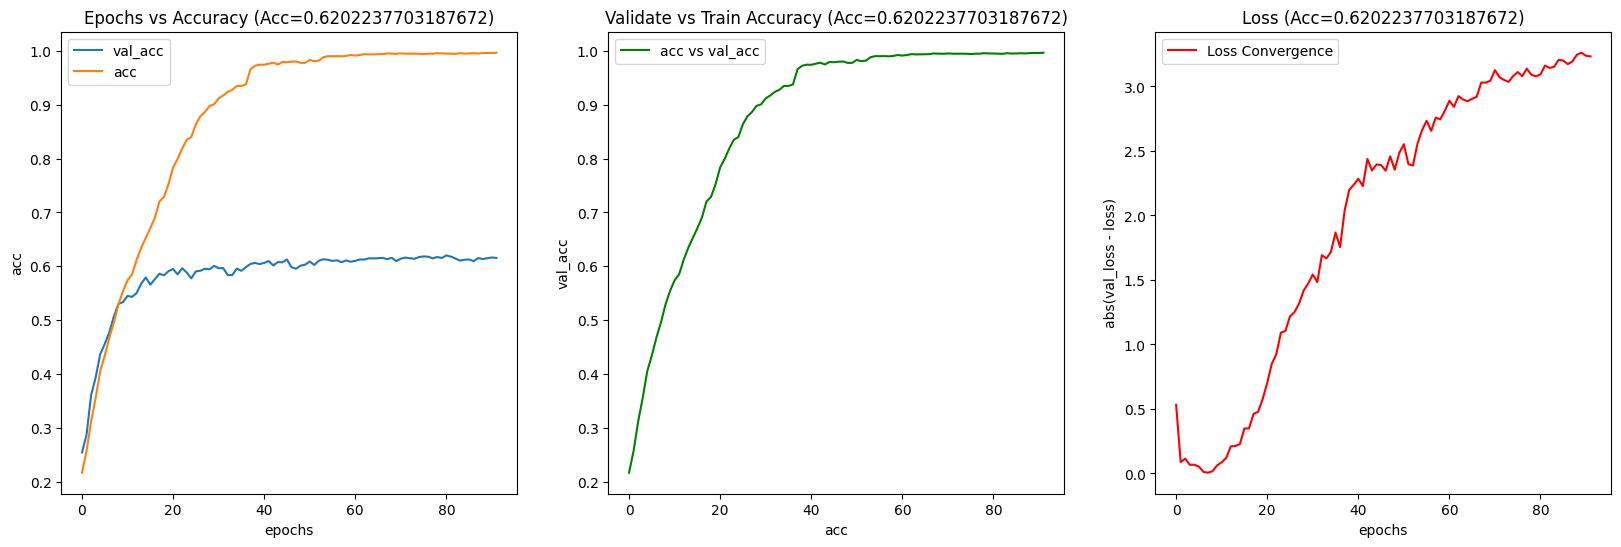

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

h1 = history.history
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
ax = sns.lineplot(y=h1['val_accuracy'], x = range(len(h1['val_accuracy'])), label="val_acc")
ax.set(xlabel='epochs', ylabel='acc')
ax = sns.lineplot(y=h1['accuracy'], x = range(len(h1['val_accuracy'])), label = "acc")
ax.set(xlabel="epochs", ylabel="acc")
plt.title(f"Epochs vs Accuracy (Acc={test_accuracy})")


plt.subplot(1,3,2)
ax = sns.lineplot(y=h1['accuracy'], x = range(len(h1['val_accuracy'])), label="acc vs val_acc", color="green", sort=False)
ax.set(xlabel='acc', ylabel='val_acc')
plt.legend()
plt.title(f"Validate vs Train Accuracy (Acc={test_accuracy})")

plt.subplot(1,3,3)
pdtmp1 = abs(pd.DataFrame(h1['loss'])-pd.DataFrame(h1['val_loss']))
pdtmp1.fillna(0,inplace=True)
ax = sns.lineplot(y=pdtmp1[0], x = range(0, len(h1['val_loss']),1), label="Loss Convergence", color="red")
ax.set(xlabel='epochs', ylabel='abs(val_loss - loss)')
plt.legend()
plt.title(f"Loss (Acc={test_accuracy})")
plt.show()

<Axes: >

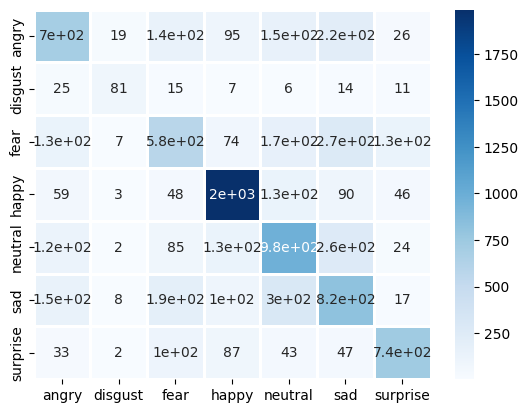

In [ ]:
import sklearn
import seaborn as sns
cf_matrix = sklearn.metrics.confusion_matrix(Y_test, pred)
sns.heatmap(cf_matrix, cmap = 'Blues', linewidth = 1, annot = True, xticklabels=class_names, yticklabels=class_names)